In [1]:
#In this case study, we're going to various applications of unsupervised learning methods
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn.datasets

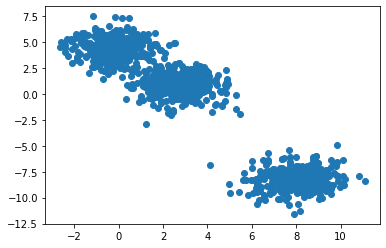

In [2]:
#Let's generate some data sets to try clustering on
#We'll start with three blobs
X_blobs = sklearn.datasets.make_blobs(n_samples=1000)[0]
plt.scatter(X_blobs[:,0],X_blobs[:,1])

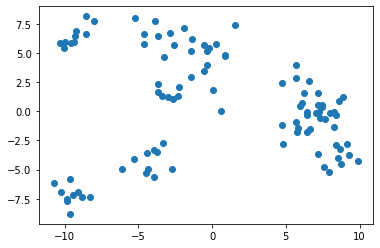

In [3]:
#Here are ten, sparse blobs
X_blobs_sparse = sklearn.datasets.make_blobs(n_samples=100,centers=10)[0]
plt.scatter(X_blobs_sparse[:,0],X_blobs_sparse[:,1])

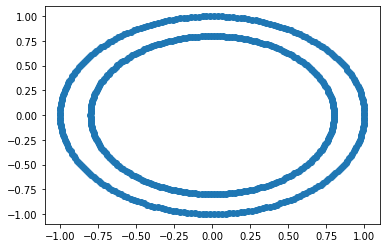

In [4]:
#Two concentric circles
X_circles = sklearn.datasets.make_circles(n_samples=500)[0]
plt.scatter(X_circles[:,0],X_circles[:,1])

C:\Users\Elchanan\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass shuffle=200 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


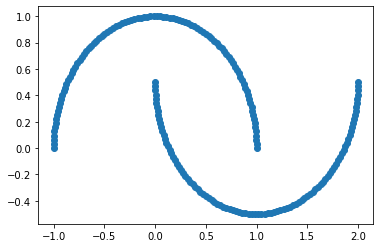

In [5]:
#Two moons
X_moons = sklearn.datasets.make_moons(200,200)[0]
plt.scatter(X_moons[:,0],X_moons[:,1])

C:\Users\Elchanan\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.
C:\Users\Elchanan\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


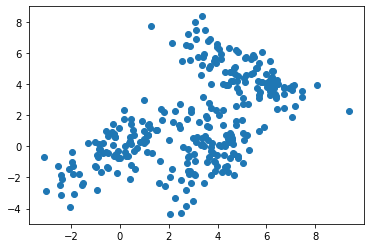

In [6]:
#Three non-isotropic Gaussians
X_gaussians = []
X_gaussians.extend(np.random.multivariate_normal([0,0], [[2,1.5],[1.5,2]], 100))
X_gaussians.extend(np.random.multivariate_normal([5,5], [[-2,1.5],[1.5,-2]], 100))
X_gaussians.extend(np.random.multivariate_normal([4,0], [[0.2,1.5],[1.5,3]], 100))
X_gaussians = np.asarray(X_gaussians)
plt.scatter(X_gaussians[:,0],X_gaussians[:,1])

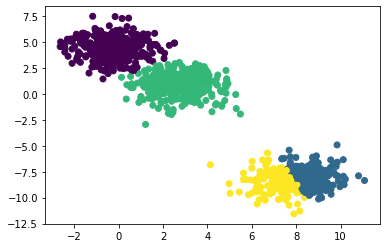

In [7]:
#Let's start with Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4).fit(X_blobs)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=kmeans.labels_)

Text(0, 0.5, 'Inertia')

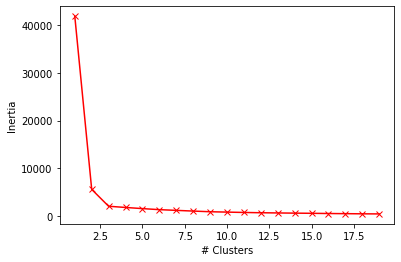

In [8]:
#How do we know how many clusters to use? Let's compute inertia for many options
inertias = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i).fit(X_blobs)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,20),inertias,'rx-')
plt.xlabel("# Clusters")
plt.ylabel("Inertia")


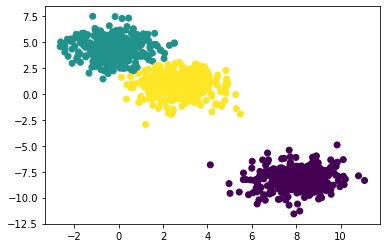

In [9]:
#Let's confirm that 3 clusters looks better
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3).fit(X_blobs)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=kmeans.labels_)

Text(0, 0.5, 'Inertia')

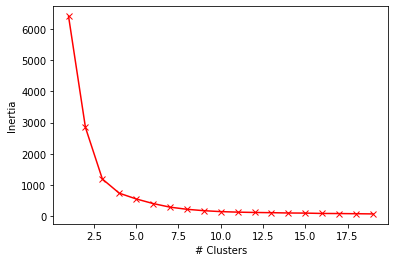

In [10]:
#Let's move on to the sparse blobs
inertias = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i).fit(X_blobs_sparse)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,20),inertias,'rx-')
plt.xlabel("# Clusters")
plt.ylabel("Inertia")

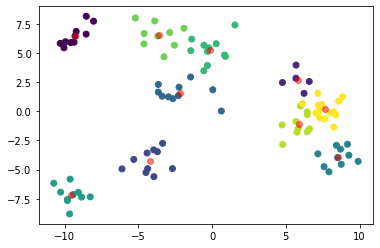

In [11]:
#Even with sparse blobs, this looks good!
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10).fit(X_blobs_sparse)
plt.scatter(X_blobs_sparse[:,0],X_blobs_sparse[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r',alpha=0.5)

Text(0, 0.5, 'Inertia')

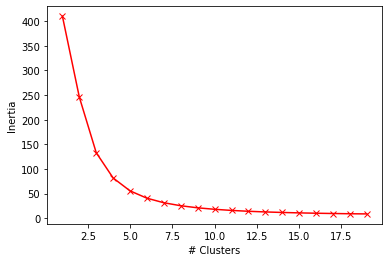

In [12]:
#Now we consider circles
inertias = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i).fit(X_circles)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,20),inertias,'rx-')
plt.xlabel("# Clusters")
plt.ylabel("Inertia")

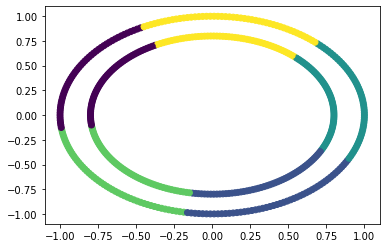

In [13]:
#This is really not what we want!
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5).fit(X_circles)
plt.scatter(X_circles[:,0],X_circles[:,1],c=kmeans.labels_)

In [14]:
#Challenge 1: Using the moons and Gaussian blobs data sets, use the inertia curve to find a good cluster value K, and visualize the clustering. 
#Are you happy with what you got?

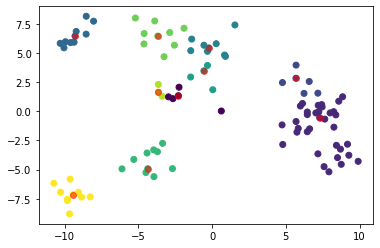

In [15]:
#Let's now try KMedoids
from sklearn_extra.cluster import KMedoids
kmed = KMedoids(n_clusters = 10).fit(X_blobs_sparse)
plt.scatter(X_blobs_sparse[:,0],X_blobs_sparse[:,1],c=kmed.labels_)
plt.scatter(kmed.cluster_centers_[:,0],kmed.cluster_centers_[:,1],c='r',alpha=0.5)


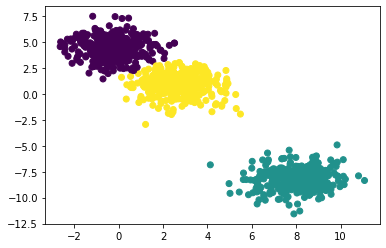

In [37]:
#We now import GMMs and see how they do on blobs...not bad
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3,covariance_type='spherical')
gmm.fit(X_blobs)
color=gmm.predict(X_blobs)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=color)

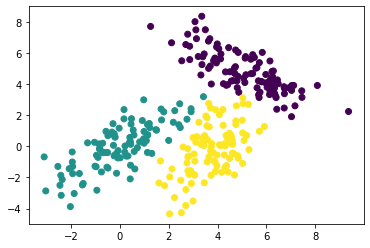

In [41]:
#They also do well on the Gaussians, as we had hoped!
gmm = mixture.GaussianMixture(n_components=3,covariance_type='full')
gmm.fit(X_gaussians)
color=gmm.predict(X_gaussians)
plt.scatter(X_gaussians[:,0],X_gaussians[:,1],c=color)

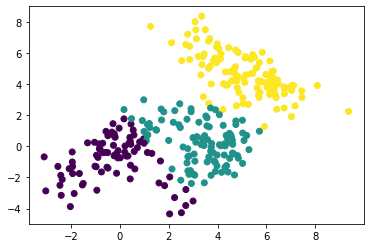

In [45]:
#Though they don't do so well if they are forced to share the same covariance matrix!
gmm = mixture.GaussianMixture(n_components=3,covariance_type='tied')
gmm.fit(X_gaussians)
color=gmm.predict(X_gaussians)
plt.scatter(X_gaussians[:,0],X_gaussians[:,1],c=color)

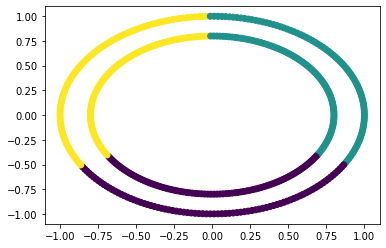

In [42]:
#It fails for the circles!
gmm = mixture.GaussianMixture(n_components=3,covariance_type='full')
gmm.fit(X_circles)
color=gmm.predict(X_circles)
plt.scatter(X_circles[:,0],X_circles[:,1],c=color)

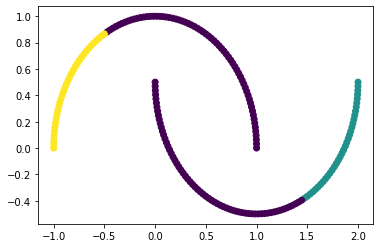

In [43]:
#nor does GMM do well for the moons.
gmm = mixture.GaussianMixture(n_components=3,covariance_type='full')
gmm.fit(X_moons)
color=gmm.predict(X_moons)
plt.scatter(X_moons[:,0],X_moons[:,1],c=color)

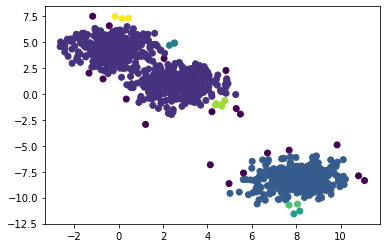

In [49]:
#We now turn to clustering by continuity...DBSCAN. We first apply it to the blobs. Ok, but it sees two clusters not three!
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=2).fit(X_blobs)
color=clustering.labels_
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=color)

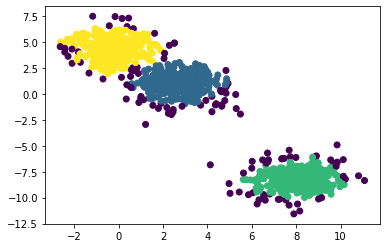

In [51]:
#We get three clusters if we change min_samples
clustering = DBSCAN(eps=0.5, min_samples=10).fit(X_blobs)
color=clustering.labels_
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=color)

In [55]:
#The performance on the Gaussians isn't great
clustering = DBSCAN(eps=0.5, min_samples=10).fit(X_gaussians)
color=clustering.labels_
plt.scatter(X_gaussians[:,0],X_gaussians[:,1],c=color)

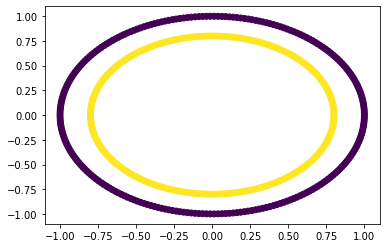

In [73]:
#But we get good performance for the circles.
clustering = DBSCAN(eps=0.1, min_samples=5).fit(X_circles)
color=clustering.labels_
plt.scatter(X_circles[:,0],X_circles[:,1],c=color)

In [63]:
#And likewise for the moons.
clustering = DBSCAN(eps=0.5, min_samples=2).fit(X_moons)
color=clustering.labels_
plt.scatter(X_moons[:,0],X_moons[:,1],c=color)

In [ ]:
#Challenge 2: Build a data set where DBScan and GMMs work well, but not KMeans.

In [ ]:
#We now turn to some applications of clustering!

In [75]:
#Application 1: Clustering and Image Segmentation / Compression
from matplotlib.image import imread
image = imread("ladybug.png")
plt.imshow(image)
print(image.shape)

(478, 726, 4)


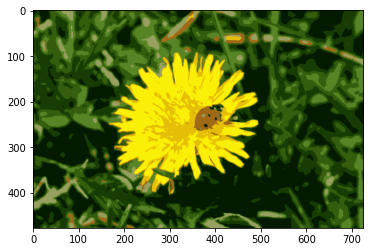

In [76]:
X = image.reshape(-1,4)
kmeans = KMeans(n_clusters = 8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

In [77]:
#Challenge 3: This segmentation uses only the color data. What if we also want our segments to be spatially
#segmented? Can you find an easy way to do this?

In [98]:
#Application 2: Preprocessing
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits,y_digits)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0,max_iter=10000)
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9755555555555555

In [218]:
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, TransformerMixin
class X_to_cluster_distances(BaseEstimator, TransformerMixin):
    def __init__(self,K):
        self.K = K
    def fit(self,X,y = None):
        km = KMeans(self.K)
        km.fit(X)
        self.centers = km.cluster_centers_
    def transform(self, X,y = None):
        return cdist(X,self.centers)
    def fit_transform(self, X,y = None):
        self.fit(X)
        D = self.transform(X)
        return D



In [222]:
from sklearn.pipeline import Pipeline
from warnings import simplefilter
# ignore all warnings
simplefilter(action='ignore')

pipeline = Pipeline([("kmeans_to_dist", X_to_cluster_distances(K=100)),
("log_reg",LogisticRegression(max_iter=1000))])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('kmeans_to_dist', X_to_cluster_distances(K=100)),
                ('log_reg', LogisticRegression(max_iter=1000))])

In [223]:
pipeline.score(X_test,y_test)

0.98

In [225]:
#Let's find the best K using a grid search
from sklearn.model_selection import GridSearchCV
param_grid = [{'kmeans_to_dist__K':range(10,100,5)}]
grid_clf = GridSearchCV(pipeline,param_grid,cv=3,verbose=2)
grid_clf.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ...............................kmeans_to_dist__K=10; total time=   0.7s
[CV] END ...............................kmeans_to_dist__K=10; total time=   0.7s
[CV] END ...............................kmeans_to_dist__K=10; total time=   0.7s
[CV] END ...............................kmeans_to_dist__K=15; total time=   0.7s
[CV] END ...............................kmeans_to_dist__K=15; total time=   0.8s
[CV] END ...............................kmeans_to_dist__K=15; total time=   0.8s
[CV] END ...............................kmeans_to_dist__K=20; total time=   0.8s
[CV] END ...............................kmeans_to_dist__K=20; total time=   0.8s
[CV] END ...............................kmeans_to_dist__K=20; total time=   0.8s
[CV] END ...............................kmeans_to_dist__K=25; total time=   0.9s
[CV] END ...............................kmeans_to_dist__K=25; total time=   1.3s
[CV] END ...............................kmeans_t

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans_to_dist',
                                        X_to_cluster_distances(K=100)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=1000))]),
             param_grid=[{'kmeans_to_dist__K': range(10, 100, 5)}], verbose=2)

In [226]:
grid_clf.best_params_

{'kmeans_to_dist__K': 95}

In [228]:
grid_clf.score(X_test,y_test)

0.9822222222222222

In [365]:
#Application 3: Let's look at semi-supervised learning
#What happens if we train with only 50 data points?
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])
log_reg.score(X_test,y_test)

0.8511111111111112

In [371]:
#Let's take the 50 closest data points to the cluster centers
kmeans = KMeans(n_clusters = 50,random_state=0)
X_digits_dist = kmeans.fit_transform(X_train)
rep_digit_idx = np.argmin(X_digits_dist,axis=0)
X_rep_digits = X_train[rep_digit_idx]

In [372]:
#Let's plot some of the figures...
def plot_digits(data):
    fig, axes = plt.subplots(5,10,figsize=(10,4),subplot_kw = {'xticks':[], 'yticks':[]},
                            gridspec_kw = dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap = 'binary', interpolation='nearest', clim=(0,16))
plot_digits(X_rep_digits)

In [373]:
#Using these data points improves accuracy
log_reg = LogisticRegression()
log_reg.fit(X_rep_digits,y_train[rep_digit_idx])
log_reg.score(X_test,y_test)


0.9155555555555556

In [374]:
#Now let's try "data propagation"
y_train_prop = np.empty(len(X_train),dtype = np.int32)
for i in range(50):
    y_train_prop[kmeans.labels_==i] = y_train[rep_digit_idx][i]

In [375]:
#Slight improvement...but maybe we are over-propogating?
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train_prop)
log_reg.score(X_test,y_test)


0.92

In [390]:
#Let's only take the 10% closest points to each cluster

percentiles = []
for k in range(50):
    cluster = X_train[kmeans.labels_ == k]
    center = kmeans.cluster_centers_[k]
    distances = [np.linalg.norm(pt - center) for pt in cluster]
    percentiles.append(np.percentile(distances,10))

close_enough = []
for i, pt in enumerate(X_train):
    l = kmeans.labels_[i]
    if np.linalg.norm(pt - 
    kmeans.cluster_centers_[l]) <= percentiles[l]:
        close_enough.append(True)
    else:
        close_enough.append(False)
    
print(np.sum(close_enough))


160


In [391]:
#A little bit better!
log_reg = LogisticRegression()
log_reg.fit(X_train[close_enough],y_train_prop[close_enough])
log_reg.score(X_test,y_test)


0.9244444444444444